# Домашняя работа №1

**Срок сдачи:** 9 октября 2017, 23:59 <br\>

При отправлении ДЗ в Dropbox указывайте фамилию в названии файла: <br\>
** IDA<Номер группы>HW1<Фамилия>.ipynb ** - например ** IDA1HW1Panov.ipynb **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Регрессия-с-SVM-(3-балла)" data-toc-modified-id="Регрессия-с-SVM-(3-балла)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a href="#Визуализация-данных-(1-балл)" data-toc-modified-id="Визуализация-данных-(1-балл)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a href="#Обучение-моделей-(2-балла)" data-toc-modified-id="Обучение-моделей-(2-балла)-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a href="#Определение-языка-слова-(7-баллов)" data-toc-modified-id="Определение-языка-слова-(7-баллов)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a href="#Загрузка-(1-балл)" data-toc-modified-id="Загрузка-(1-балл)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a href="#Подход-с-n-граммами-(2-балла)" data-toc-modified-id="Подход-с-n-граммами-(2-балла)-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подход с n-граммами (2 балла)</a></div><div class="lev2 toc-item"><a href="#Подход-с-пользовательским-ядром" data-toc-modified-id="Подход-с-пользовательским-ядром-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подход с пользовательским ядром</a></div><div class="lev3 toc-item"><a href="#Подготовка-данных-(1-балла)" data-toc-modified-id="Подготовка-данных-(1-балла)-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Подготовка данных (1 балла)</a></div><div class="lev3 toc-item"><a href="#Расчет-ядра-(2-балла)" data-toc-modified-id="Расчет-ядра-(2-балла)-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Расчет ядра (2 балла)</a></div><div class="lev3 toc-item"><a href="#Оценка-качества-(1-балл)" data-toc-modified-id="Оценка-качества-(1-балл)-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

# Регрессия с SVM (3 балла)

SVM можно использовать и для задачи регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (вычет среднего и деление на стандартное отклонение) и выведите их на графике.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('titanium.csv')
data.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(data.x.values.reshape(len(data.x), 1))
y = data.y

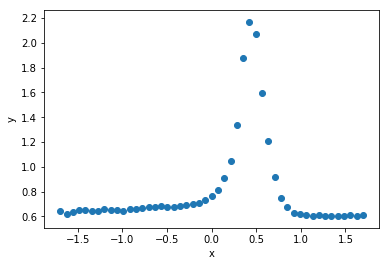

In [4]:
plt.scatter(X, y.values)
plt.xlabel('x')
plt.ylabel('y')

## Обучение моделей (2 балла)

Рассмотрим 3 ядра: 
* Линейное
* Полиномиальное (`degree = 3`, `gamma = 6`, `coef0 = 1`)
* RBF (`gamma = 6`, `coef0 = 1`)

Во всех случаях установите точность алгоритма оптимизации `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наилучшего параметра $C$ постройте график с данными и предсказанием с помощью SVM.

В каких случаях возникают эффекты недообучения, переобучения?

**Линейное ядро:**

In [5]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
mae = make_scorer(mean_absolute_error, greater_is_better = False)
C_range = np.logspace(-2, 10, 100)
param_grid = {'C' : list(C_range)} 
lin_svr = LinearSVR(C = C_range, epsilon = 0.01)

grid = GridSearchCV(estimator = lin_svr, param_grid=param_grid, scoring = mae)
grid.fit(X, y)
print(grid.best_params_)

{'C': 0.040370172585965536}


In [6]:
mean_mistake = np.negative(grid.cv_results_.get('mean_test_score'))

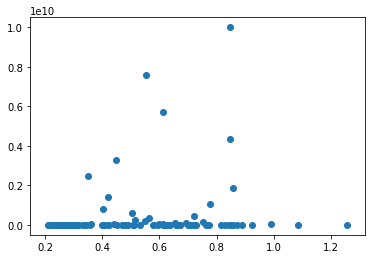

In [7]:
plt.scatter(mean_mistake, C_range)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)
lin_svr_best = LinearSVR(C = 0.040370172585965536, epsilon = 0.01)
lin_svr_best.fit(X_train, y_train)
y_pred = lin_svr_best.predict(X_test)

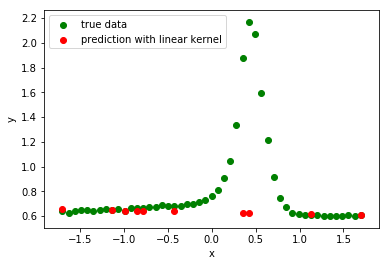

In [9]:
plt.scatter(X, y, c = 'green', label = 'true data')
plt.scatter(X_test, y_pred, c = 'red', label = 'prediction with linear kernel')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)

**Полиномиальное ядро:**

In [10]:
C_range_poly = np.logspace(-2, 1, 10)
param_grid_poly = {'C' : list(C_range_poly)}

In [11]:
from sklearn.svm import SVR
poly_svr = SVR(kernel = 'poly', C = C_range_poly, epsilon = 0.01, degree = 3, gamma = 6, coef0 = 1)
grid_poly = GridSearchCV(estimator = poly_svr, param_grid=param_grid_poly, scoring = mae)
grid_poly.fit(X, y)

print(grid_poly.best_params_)

{'C': 0.01}


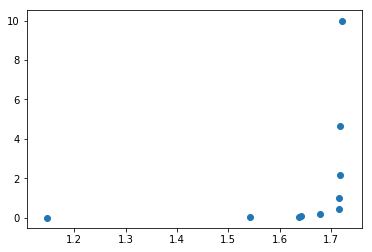

In [12]:
mean_mistake_poly = np.negative(grid_poly.cv_results_.get('mean_test_score'))
plt.scatter(mean_mistake_poly, C_range_poly)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)
poly_svr_best = SVR(kernel = 'poly', C = 0.01, epsilon = 0.01, degree = 3, gamma = 6, coef0 = 1)
poly_svr_best.fit(X_train, y_train)
y_pred = poly_svr_best.predict(X_test)

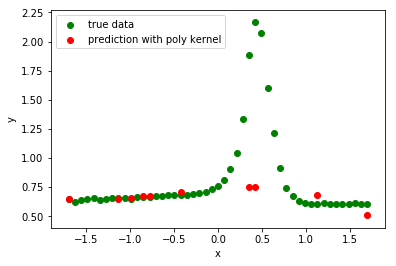

In [14]:
plt.scatter(X, y, c = 'green', label = 'true data')
plt.scatter(X_test, y_pred, c = 'red', label = 'prediction with poly kernel')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)

**RBF:**

In [15]:
C_range_rbf = np.logspace(-1, 2, 100)
param_grid_rbf = {'C' : list(C_range_rbf)}
rbf_svr = SVR(kernel = 'rbf', C = C_range_rbf, epsilon = 0.01, gamma = 6, coef0 = 1)
grid_rbf = GridSearchCV(estimator = rbf_svr, param_grid=param_grid_rbf, scoring = mae)
grid_rbf.fit(X, y)

print(grid_rbf.best_params_)

{'C': 7.0548023107186451}


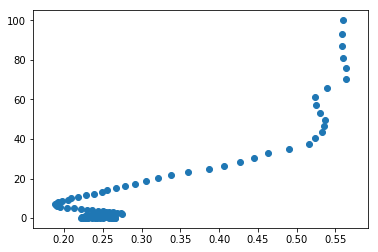

In [16]:
mean_mistake_rbf = np.negative(grid_rbf.cv_results_.get('mean_test_score'))
plt.scatter(mean_mistake_rbf, C_range_rbf)

In [17]:
rbf_svr_best = SVR(kernel = 'rbf', C = 7.0548023107186451, epsilon = 0.01, gamma = 6, coef0 = 1)
rbf_svr_best.fit(X_train, y_train)
y_pred_rbf = rbf_svr_best.predict(X_test)

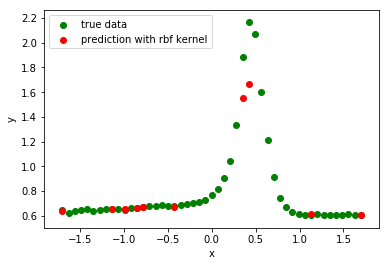

In [18]:
plt.scatter(X, y, c = 'green', label = 'true data')
plt.scatter(X_test, y_pred_rbf, c = 'red', label = 'prediction with rbf kernel')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)

*Вывод: линейное и полиномиальное ядра работают плохо, недообучаются, а rbf лучше всего*

# Определение языка слова (7 баллов)

В данном задании вам необходимо построить модель, которая будет определять, на каком языке написано слово. Сделать это будет предложено двумя способами.

Даны два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова.

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [69]:
df_es = pd.read_table('war_and_peace_es.txt', names = ['word', 'label'])
df_es.label = 0
df_en = pd.read_table('war_and_peace_en.txt', names = ['word', 'label'])
df_en.label = 1
df = pd.concat([df_es,df_en])
df.head()

,word,label
0,guerra,0
1,pace,0
2,lev,0
3,nicoevic,0
4,tolstj,0


## Подход с n-граммами (2 балла)

На этом этапе предлагается построить модель используя n-граммы слов, то есть последовательностях из n символов.<br/>
Таким образом, признаками наших данных будут все найденные n-граммы слов, а значениями признаков будут частоты соответствующих n-грамм в слове.<br/>
Например, для слова "guerra" би-граммами будут "gu", "ue", "er", "rr", "ra", каждая из которых встречается в нем с частотой 1.

Для того, чтобы выделять n-граммы, удобно использовать `CountVectorizer()` с аргументами `analyzer='char'` и `ngram_range=(n_min, n_max)`. Вы наверняка встречались с этим векторизатором в предыдущем модуле.

Таким образом, сделайте следующее:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Разбейте данные на обучающую и отложенную выборку в пропорции 80/20
3. Составьте [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), состоящий из `CountVectorizer()` и SVM с линейным ядром
4. Исследуйте, как влияют размер n-грамм и величина штрафа `C` на предсказательную силу модели. Мера качества - accuracy.

In [20]:
from sklearn.model_selection import train_test_split
RND_SEED = 123
df_x = df.word
df_y = df.label
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = RND_SEED)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
cvect = CountVectorizer(input='df', analyzer='char', ngram_range=(2, 6))
lin_svc_n = LinearSVC()
pipe = Pipeline([('cvect', cvect), ('lin_svc_n',lin_svc_n)])

In [22]:
n_gram=[]
for i in range(2,6):
    for j in range(3,8):
        if i<=j:
            n_gram.append((i,j))


In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
acc = make_scorer(accuracy_score, greater_is_better = True)

In [25]:
C_pipe = list(np.logspace(-2,0,10))
grid_pipe = GridSearchCV(estimator = pipe, param_grid=dict(cvect__ngram_range = n_gram, lin_svc_n__C = C_pipe), 
                         scoring = acc)
grid_pipe.fit(df_x_train, df_y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('cvect', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='df',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 6), preprocessor=None, stop_words=None,
        strip_acc...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'cvect__ngram_range': [(2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 4), (4, 5), (4, 6), (4, 7), (5, 5), (5, 6), (5, 7)], 'lin_svc_n__C': [0.01, 0.016681005372000592, 0.027825594022071243, 0.046415888336127774, 0.077426368268112694, 0.12915496650148839, 0.21544346900318834, 0.35938136638046259, 0.59948425031894093, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(accura

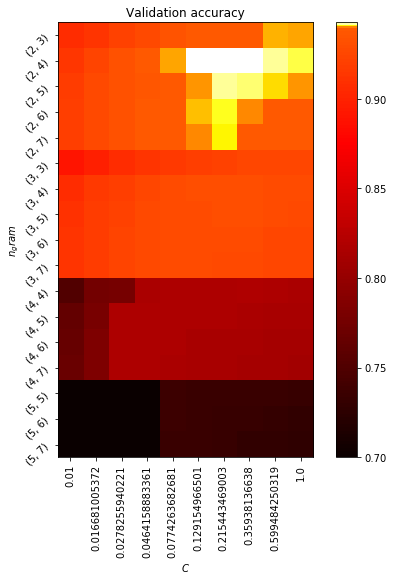

In [26]:
scores = grid_pipe.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(n_gram), len(C_pipe))
from matplotlib.colors import Normalize
#так мы делали на семинаре
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    


plt.figure(figsize=(8, 8))
plt.imshow(scores, interpolation='nearest', cmap='hot',
           norm=MidpointNormalize(vmin=0.7, midpoint=0.94))
plt.xlabel('$C$')
plt.ylabel('$n_gram$')
plt.colorbar()
plt.yticks(np.arange(len(n_gram)), n_gram, rotation=45)
plt.xticks(np.arange(len(C_pipe)), C_pipe, rotation=90)
plt.title('Validation accuracy')
plt.show()

In [27]:
grid_pipe.best_params_

{'cvect__ngram_range': (2, 4), 'lin_svc_n__C': 0.12915496650148839}

## Подход с пользовательским ядром
### Подготовка данных (1 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно может принимать на вход **только** вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы `df.sample()` и `df.reset_index()`)
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 80/20

В результате вы должны получить вектор-столбец `X_train`, `X_test` с **индексами** слов и векторы `y_train`, `y_test` с метками классов.

In [66]:
df.head()

,word,label
0,guerra,0
1,pace,0
2,lev,0
3,nicoevic,0
4,tolstj,0


In [70]:
RND_SEED = 123
df = df.sample(frac = 1, random_state = RND_SEED, replace = True)
df.reset_index(inplace = True)
df.drop('index', 1, inplace=True)
data = df[:1000]
data.head()

,word,label
0,volesse,0
1,mon,0
2,allora,0
3,last,1
4,everything,1


In [71]:
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data.index.values, 
                                                                data.label, 
                                                                test_size = 0.2, random_state = RND_SEED)

In [72]:
data_y_train[:5]

512    0
685    1
997    0
927    0
376    0
Name: label, dtype: int64

### Расчет ядра (2 балла)

Теперь напишем собственное ядро для классификации строк. Для сравнения строк будем использовать [расстояние Левенштейна](https://ru.wikipedia.org/wiki/Расстояние_Левенштейна). Реализацию этого расстояния можно получить одним из двух способов:
* скопировать функцию wfi_levenshtein из файла [pylev.py](https://github.com/toastdriven/pylev/blob/master/pylev.py)
* поставить пакет [editdistance](https://pypi.python.org/pypi/editdistance) (будет работать быстрее, чем предыдущая реализация, но могут возникнуть проблемы с установкой)

Ядро для сравнения строк должно принимать максимальное значение, когда слова одинаковы, и минимальное, когда очень отличаются. Это противоположно свойствам расстояния Левенштейна: оно равно 0, когда слова одинаковы, и максимально, когда слова разные. Поэтому подставьте значение расстояния Левенштейна в какое-нибудь ядро, зависящее от расстояния между объектами (например, гауссовское).

Функция, реализующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).
Функция должна возвращать матрицу значений ядра для всех объектов попарно: $G_{ij} = K(U_i, V_j)$. Здесь $U_i$ — i-ый объект выборки $U$, а $V_j$ — j-ый объект выборки $V$.

Сделайте следующее:
1. Напишите функцию *string_kernel(U, V)*, расчитывающую матрицу ядра $G_{ij}$
2. Визуализируйте матрицу только для тренировочной выборки (функция plt.imshow()).


In [73]:
def wfi_levenshtein(string_1, string_2):
    """
    Calculates the Levenshtein distance between two strings.
    This version uses an iterative version of the Wagner-Fischer algorithm.
    Usage::
        >>> wfi_levenshtein('kitten', 'sitting')
        3
        >>> wfi_levenshtein('kitten', 'kitten')
        0
        >>> wfi_levenshtein('', '')
        0
    """
    if string_1 == string_2:
        return 0

    len_1 = len(string_1)
    len_2 = len(string_2)

    if len_1 == 0:
        return len_2
    if len_2 == 0:
        return len_1

    if len_1 > len_2:
        string_2, string_1 = string_1, string_2
        len_2, len_1 = len_1, len_2

    d0 = [i for i in range(len_2 + 1)]
    d1 = [j for j in range(len_2 + 1)]

    for i in range(len_1):
        d1[0] = i + 1
        for j in range(len_2):
            cost = d0[j]

            if string_1[i] != string_2[j]:
                # substitution
                cost += 1

                # insertion
                x_cost = d1[j] + 1
                if x_cost < cost:
                    cost = x_cost

                # deletion
                y_cost = d0[j + 1] + 1
                if y_cost < cost:
                    cost = y_cost

            d1[j + 1] = cost

        d0, d1 = d1, d0

    return d0[-1]



In [74]:
def string_kernel(U,V):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(U.shape[0]):
        for j in range(V.shape[0]):
            G[i][j]=np.exp(-wfi_levenshtein(df.word[U[i][0]], df.word[V[j][0]]))
    return G

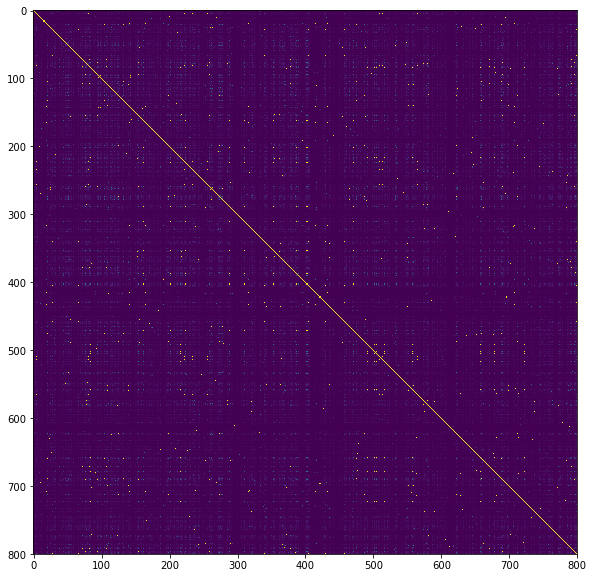

In [76]:
pic = string_kernel(data_x_train.reshape(800,1), data_x_train.reshape(800,1))
plt.figure(figsize=(10, 10))
plt.imshow(pic)

### Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке. Для улучшения качества можно увеличить размер тренировочной выборки. Но тогда обучение будет происходить дольше.

In [124]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
acc = make_scorer(accuracy_score)
C_svc = np.logspace(-4,0,20)
param_grid_svc = {'C' : list(C_svc)}
data_x_train = data_x_train.reshape(800, 1)
svc_df = SVC(kernel='precomputed')
grid_svc_df = GridSearchCV(estimator = svc_df, param_grid = param_grid_svc, scoring = acc)
grid_svc_df.fit(pic, data_y_train)
grid_svc_df.best_params_

{'C': 1.0}

In [125]:
grid_svc_df.best_score_

0.8125

In [126]:
mean_error_test = grid_svc_df.cv_results_.get('mean_test_score') #accuracy на тестовой и обучающей
mean_error_train = grid_svc_df.cv_results_.get('mean_train_score')

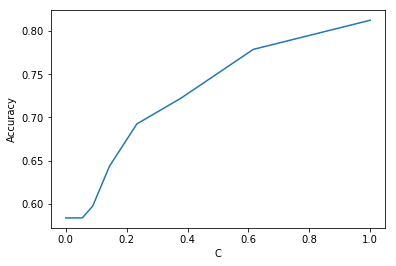

In [127]:
plt.plot(list(C_svc), mean_error_test)
plt.xlabel('C')
plt.ylabel('Accuracy')

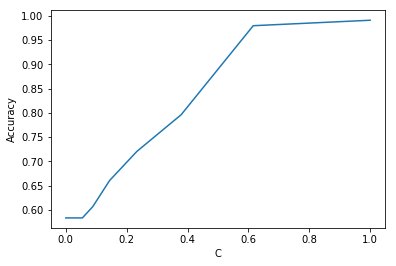

In [128]:
plt.plot(list(C_svc), mean_error_train)
plt.xlabel('C')
plt.ylabel('Accuracy')

In [135]:
svc_df_best = SVC(kernel=string_kernel, C = 1.0)
svc_df_best.fit(data_x_train, data_y_train)
y_pred = svc_df_best.predict(data_x_test.reshape(200,1))

In [136]:
accuracy_score(data_y_test, y_pred)

0.77500000000000002